In [1]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
import sys

dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Visible'
folder = '20221108_1%_PrYVO4_absorption_visible_laser'
# Measured data through the crystal, the first one is horizontal polarised and the second one is vertical polarised
files_data=['ABS11825.csv','ABS11826.csv'] 
# Measured references through the empty hole, the first one is horizontal polarised and the second one is vertical polarised
# You can disable this if you do not have the data, and run the third cell please
files_ref =['ABS11839.csv','ABS11840.csv'] 

num_of_files=np.size(files_data)

100000
100000


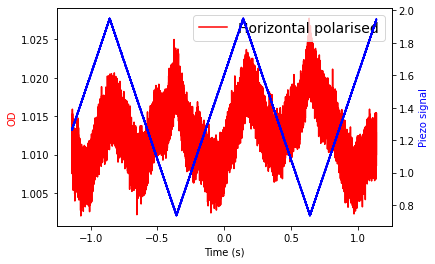

90862
7737
7737


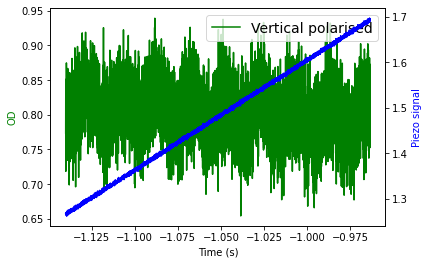

In [2]:
# In this cell, we used the measured references as the ref values 
# for calculating the OD
for index in range(num_of_files):
    path_data=dir + '\\' + folder + '\\' + files_data[index]
    path_ref =dir + '\\' + folder + '\\' + files_ref[index]
    data=pd.read_csv(path_data)
    data=data.to_numpy()
    ref =pd.read_csv(path_ref)
    ref =ref.to_numpy()
    print(len(data[:,0]))
    print(len(ref[:,0]))
    #Need to judge the length of all the data
    if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3] # The transmission siganl is normalised by the reflected reference signal
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[0:length_data,2]/data[0:length_data,2])
        print(length_data)
        if index==0:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD, 'r-', label='Horizontal polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='r')
            ax2.set_ylabel('Piezo signal', color='b')
            plt.show()

        elif index==1:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD, 'g-', label='Vertical polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='g')
            ax2.set_ylabel('Piezo signal', color='b')
            plt.show()
        test=1
    else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3]
        normalised_ref=ref[:,2]/ref[:,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[:,2]/data[:,2])
        if index==0:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD1, 'r-', label='Horizontal polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='r')
            ax2.set_ylabel('Piezo signal', color='b')
            plt.show()

        elif index==1:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.plot(Time, OD1, 'g-', label='Vertical polarised')
            ax1.legend(loc='upper right',fontsize=14)
            ax2.plot(Time, Piezo_trigger_signal, 'b-')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('OD', color='g')
            ax2.set_ylabel('Piezo signal', color='b')
            plt.show()
        test=0

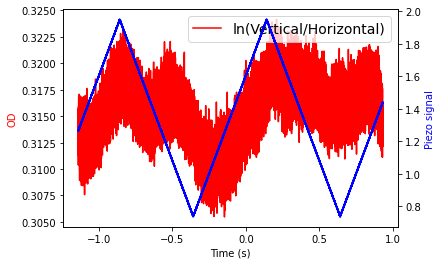

In [3]:
# In this cell, we use the measured transmission signal, when the laser
# polarisation is vertical, as the ref values for calculating the OD
path_data=dir + '\\' + folder + '\\' + files_data[0]
path_ref =dir + '\\' + folder + '\\' + files_data[1]
data=pd.read_csv(path_data)
data=data.to_numpy()
ref =pd.read_csv(path_ref)
ref =ref.to_numpy()

if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/data[0:length_data,3]
        normalised_ref=ref[0:length_data,2]/ref[0:length_data,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[0:length_data,2]/data[0:length_data,2])
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        plt.show()
else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/data[:,3]
        normalised_ref=ref[:,2]/ref[:,3]
        OD=np.log(normalised_ref/normalised_data)
        OD1=np.log(ref[:,2]/data[:,2])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        plt.show()